# 한글 워드 클라우드 - 여친선물

- 'konlpy 오류시 참고'로 검색
- 파이썬 버전에 맞게 설치
- download한 디렉터리로 이동 (cmd)
- conda activate base
- pip install konlpy
- 

In [60]:
import konlpy
konlpy.__version__


'0.5.2'

In [61]:
# open korean text
from konlpy.tag import Okt
okt = Okt()
okt.nouns('해당 에러가 발생하는 것을 알 수 있다.')


['해당', '에러', '발생', '것', '알', '수']

### 여친 선물 - 워드클라우드 만들기

In [62]:
with open('data/gift.txt', encoding='utf8') as file:
    gift_text = file.read()

In [63]:
tokens = okt.nouns(gift_text)
tokens[:10]

['반지', '목걸이', '커플', '가디건', '커플', '모자', '신지', '몇개', '추천', '제품']

In [64]:
# 한글 이외의 글자는 제거
import re
new_tokens=[]
for token in tokens :
    new_token = re.sub('[^가-힣 ]','',token)
    if new_token:                       # ''는 포함시키지 말 것
        new_tokens.append(new_token)

In [65]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'Malgun Gothic'

- 엉터리 단어 제거 - 수동으로 처리

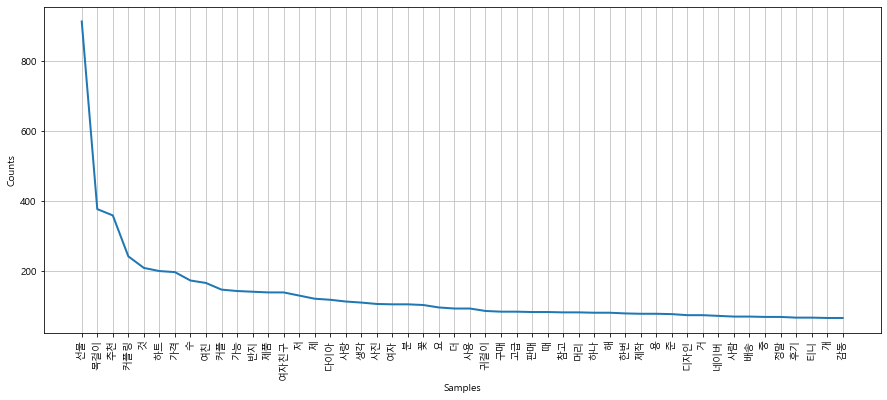

In [66]:
import nltk
gf_gift = nltk.Text(new_tokens, name='여친선물')
plt.figure(figsize=(15,6))
gf_gift.plot(50)
plt.show()

In [67]:
stop_list=['선물','추천']
stop_words = '요 더 사용 구매 고급 판매 때 참고 머리 하나 선물 추천 것 가격 수 여친 커플 가능 제품 여자친구 체 제 사랑 생각 여자 분'
stop_list = stop_words.split()

In [68]:
# 기왕이면 간단한 리스트표현식으로 쓸것
new_tokens_list = []
for token in new_tokens:
    if token not in stop_list:
        new_tokens_list.append(token)
new_tokens = new_tokens_list

In [69]:
# 리스트 표현식
new_tokens = [token for token in new_tokens if token not in stop_list]


- 워드 클라우드 그리기

In [89]:
 import numpy as np
 from PIL import Image
 from wordcloud import WordCloud

In [90]:
data = gf_gift.vocab().most_common(300)
data[:10]

[('선물', 914),
 ('목걸이', 378),
 ('추천', 360),
 ('커플링', 243),
 ('것', 210),
 ('하트', 201),
 ('가격', 198),
 ('수', 174),
 ('여친', 167),
 ('커플', 148)]

In [91]:
wc = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.2,
    background_color='white' 
).generate_from_frequencies(dict(data))


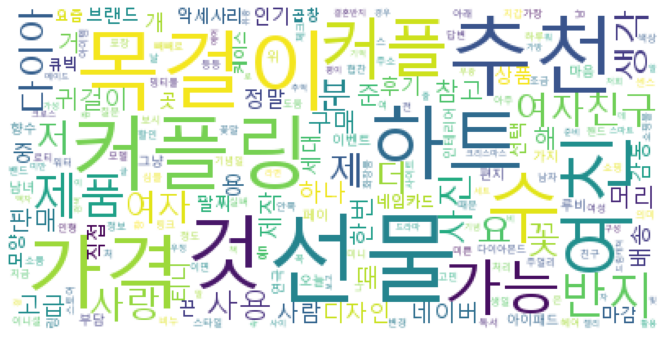

In [92]:
plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [93]:
# 하트 그림 표시하기
from wordcloud import ImageColorGenerator
mask = np.array(Image.open('data/heart.jpg'))
image_colors = ImageColorGenerator(mask)


In [94]:
wc = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.2, mask=mask,
    background_color='white',
    min_font_size=1, max_font_size=100
).generate_from_frequencies(dict(data))
default_colors = wc.to_array()

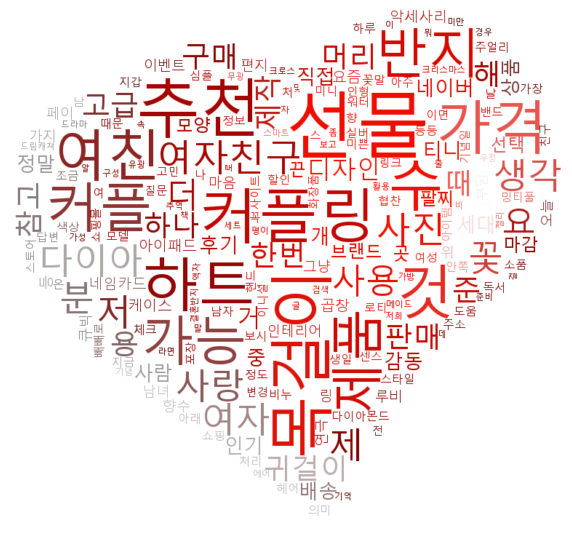

In [95]:
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()